In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from scipy import integrate
from scipy import optimize
from scipy.optimize import fmin

In [22]:
zdata = np.loadtxt('SN.dat',usecols=[1])
u = np.loadtxt('SN.dat',usecols=[2])
sig = np.loadtxt('SN.dat',usecols=[3])

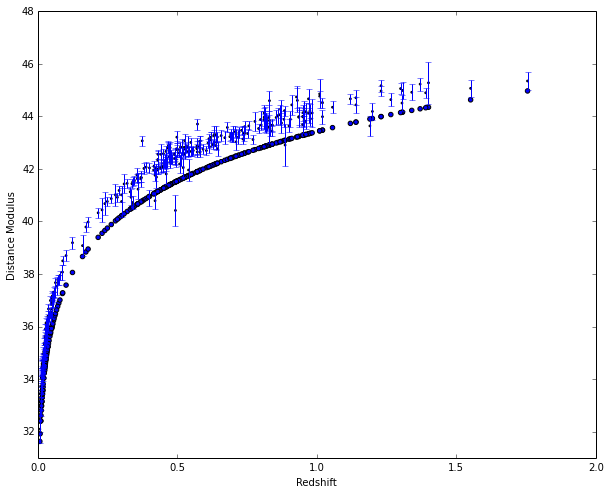

In [103]:
#2 : Plotting the theoretical model with the data.

OmegaM = 0.23
OmegaL = 1.0 - OmegaM
h = 0.7
MU = []
intEz = []
steps = 100
ending = 2.0


def E(z):
    Ez0 = 3000*h/(np.sqrt(OmegaM*np.power((1.0+z),3.0)+OmegaL))
    return Ez0

function = lambda z: E(z)

for i in range(len(zdata)):
    intE = integrate.quad(function,0.0,zdata[i])
    intEz.append(intE[0])
    
DL = (1.0+zdata)*intEz
mu0 = 25.0 - 5.0*np.log10(h) + 5.0*np.log10(DL)


fig = plt.figure(1, figsize=(10,8))
plt.scatter(zdata,u,s=3)
plt.scatter(zdata,mu0)
plt.errorbar(zdata,u,yerr=sig,linestyle="None")
plt.xlim(xmin=0.0)
plt.ylim(ymin=31)
plt.xlabel('Redshift')
plt.ylabel('Distance Modulus')

In [104]:
#3 : Trying to minimize chi2...

def chi2(params,args=zdata):
    h, omegaM = params
    chi = sum(((u-mu0)/(sig))**2)
    return chi
    
fmin(chi2,params0,args=())


Optimization terminated successfully.
         Current function value: 5522.437558
         Iterations: 10
         Function evaluations: 39


array([ 0.23,  0.7 ])